In [683]:
import pywavefront
import numpy as np
from __future__ import print_function
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
np.set_printoptions(threshold=sys.maxsize)
from scipy.interpolate import CubicSpline

In [687]:
# read in face model
scene = pywavefront.Wavefront('swift-2-in_mesh.obj')
data = np.array(scene.vertices)
print(data.shape)

(26756, 3)


In [688]:
# return a column from matrix
def column(matrix, i):
    return [row[i] for row in matrix]

In [689]:
# return an array
# If the data value differs from the previous value,
# its index i would be append to array
def createIndex(data):
    prev = data[0]
    index = []
    for i in range(len(data)):
        if(data[i] != prev):
            index.append(i)
            prev = data[i]
    return index

In [690]:
# round data of an give axis and sort it
def roundAxis(data,axis):
    for i in range(len(data)):
        data[i][axis] = int(data[i][axis]/20) *20
    data = sorted(data, key = lambda x:x[axis])
    return data

In [691]:
# round x axis
data_roundX = data.copy()
print(data_roundX.shape)
data_roundX = roundAxis(data_roundX,0)
x_train_X = column(data_roundX,0)
y_train_X = column(data_roundX,1)
z_train_X = column(data_roundX,2)


ind = np.lexsort((y_train_X,x_train_X))#sort by x_axis first and then y_axis
X_train_X = [(x_train_X[i],y_train_X[i],z_train_X[i]) for i in ind] 
X_train_X = np.asarray(X_train_X)


(26756, 3)


In [692]:
# round y axis
data_roundY = data.copy()
data_roundY = roundAxis(data_roundY,1)
x_train_Y = column(data_roundY,0)
y_train_Y = column(data_roundY,1)
z_train_Y = column(data_roundY,2)

ind = np.lexsort((x_train_Y,y_train_Y))#sort by y_axis first and then x_axis
X_train_Y = [(x_train_Y[i],y_train_Y[i],z_train_Y[i]) for i in ind] 
X_train_Y = np.asarray(X_train_Y)

In [693]:
# generate index for x axis and y axis
x_index = createIndex(x_train_X)
y_index = createIndex(y_train_Y)



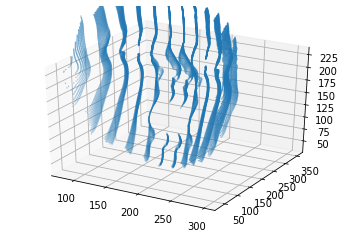

In [694]:
# visualize the face after cutting in lines
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train_X,y_train_X,z_train_X,zdir="y",s =0.1)

In [624]:
def detectSlopeChange(data,index,threshold):
    L,x_pos,y_pos = [],[],[]
    featureHeight = np.asarray(column(data,2)).mean()*1.1
    for i in range (len(index)-1):
        data_slice = data[index[i]:index[i+1]]
        if(len(data_slice) > 1000):
            prev = (data_slice[0][2]-data_slice[99][2])/100
            for j in range (0,len(data_slice)-100,100):
                data_cut = data_slice[j:j+100]
                first_height = data_cut[0][2]
                last_height = data_cut[-1][2]
                slope = (first_height-last_height)/100
                if(abs(slope - prev) > threshold):
                    if(first_height > featureHeight):
                        L.append(data_cut)
                prev = slope
    return L, x_pos,y_pos

            
        

In [625]:
feature, pos_X,pos_Y = detectSlopeChange(data_roundX.copy(),x_index, threshold = 0.3)
feature = [item for sublist in feature for item in sublist]
feature_x = column(feature,0)
feature_y = column(feature,1)
feature_z = column(feature,2)

In [633]:
x_min = min(feature_x)
x_max = max(feature_x)
y_min = min(feature_y)
y_max = max(feature_y)
x_max

240.0

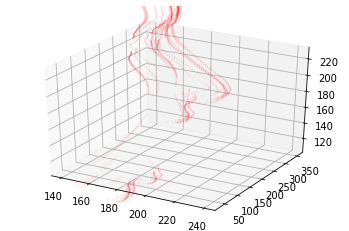

In [627]:
# visualize the face after cutting in lines
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature_x,feature_y,feature_z,zdir="x",c = "r",s =0.01)

In [656]:
def roundAxis2(dataF):
    for i in range(len(data)):
        x = data[i][0]
        y = data[i][1]
        if(x_min<= x and x <= x_max and y_min <= y and y <= y_max):
            data[i][0] = int(x/5)*5
            data[i][1] = int(y/5)*5
        else:
            data[i][0] = int(x/10)*10
            data[i][1] = int(y/10)*10
    return data

In [657]:
def feature(data):
    feature = []
    for i in range(len(data)):
        x = data[i][0]
        y = data[i][1]
        z = data[i][2]
        if(x_min<= x and x <= x_max and y_min <= y and y <= y_max):
            feature.append([x,y,z])
    return feature
        

In [658]:
data_roundX = roundAxis2(data.copy())

x_train_X = column(data_roundX,0)
y_train_X = column(data_roundX,1)
z_train_X = column(data_roundX,2)

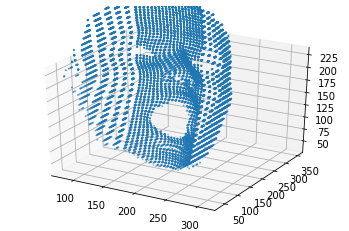

In [659]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train_X,y_train_X,z_train_X,zdir="y",s =1)

In [660]:
dict = {}
for i in range (len(x_train_X)):
    key = (x_train_X[i],y_train_X[i])
    value = z_train_X[i]
    if key in dict:
        dict[key].append(value)
    else:
        dict[key] = []
        dict[key].append(value)
matrix = []
for key in dict:
    L = dict[key]
    average = sum(L)/len(L)
    matrix.append((key[0],key[1],average))
    

In [661]:
x_train_X = column(matrix,0)
y_train_X = column(matrix,1)
z_train_X = column(matrix,2)
len(matrix)

1429

In [654]:
feature = feature(data_roundX)

TypeError: 'list' object is not callable

In [655]:
feature_x = column(feature,0)
feature_y = column(feature,1)
feature_z = column(feature,2)

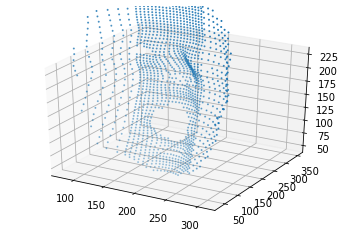

In [663]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train_X,y_train_X,z_train_X,zdir="y",s =1)

In [643]:
face_xmin = min(x_train_X)
face_xmax = max(x_train_X)
face_ymin = min(y_train_X)
face_ymax = max(y_train_X)

width = int((face_xmax - face_xmin)/5)
height = int((face_ymax - face_ymin)/5)


array([ 80.    , 220.    ,  41.2499])

In [664]:
def generateMatrix(data):
    matrix = np.zeros((width+2,height+2))
    for pos in data:
        x = int(pos[0])
        y = int(pos[1])
        z = int(pos[2])
        if (x_min<= x and x <= x_max and y_min <= y and y <= y_max):
            matrix[int((x-face_xmin)/5)][int((y-face_ymin)/5)] = z
        else:
            matrix[int((x-face_xmin)/5)][int((y-face_ymin)/5)] = z
            matrix[int((x-face_xmin)/5)+1][int((y-face_ymin)/5)] = z
            matrix[int((x-face_xmin)/5)][int((y-face_ymin)/5)+1] = z
            matrix[int((x-face_xmin)/5)+1][int((y-face_ymin)/5)+1] = z
    return matrix
    

In [676]:
 matrix = generateMatrix(data_roundX)
 matrix = np.asarray(matrix)

In [697]:
matrix[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 87., 87., 87., 87.,
       82., 82., 78., 78., 77., 77., 77., 77.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

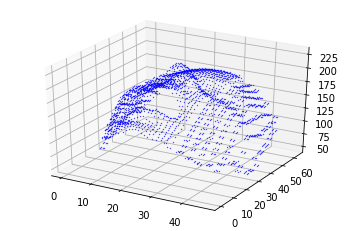

In [678]:
# plot 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        if(matrix[i][j] != 0):
            ax.scatter(i,j,matrix[i][j],zdir="z",c = "b",s =0.1)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. 140. 146. 148. 150. 150. 149. 146. 142. 140.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]


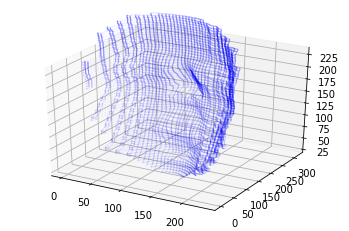

In [763]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

pos_x = 0
for line in matrix:
    y,z = [],[]
    pos_y = 0
    for point in line:
        if point != 0:
            y.append(pos_y)
            z.append(point)
        pos_y += 5
    y = np.array(y)
    z = np.array(z)
    if(y.shape[0]>0):
        cs = CubicSpline(y, z)
        zs = np.arange(y[0], y[-1], 1)
        x = np.full(zs.shape,pos_x)
        ax.scatter(x,zs,cs(zs),zdir="y",c = "b",s =0.01)
        #ax.scatter(np.full(y.shape,pos_x),y,z,zdir="z",c = "r",s =0.1)
    pos_x += 5

pos_y = 0
for i in range(matrix.shape[1]):
    line = matrix[:,i]
    x,z = [],[]
    pos_x = 0
    for point in line:
        if point != 0:
            x.append(pos_x)
            z.append(point)
        pos_x += 5
    x = np.array(x)
    z = np.array(z)
    if(x.shape[0]>0):
        cs = CubicSpline(x, z)
        zs = np.arange(x[0], x[-1], 1)
        y = np.full(zs.shape,pos_y)
        ax.scatter(zs,y,cs(zs),zdir="y",c = "b",s =0.01)
    pos_y += 5
print(matrix[:,0])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 87., 87., 87., 87.,
       82., 82., 78., 78., 77., 77., 77., 77.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 140., 146., 148.,
       150., 150., 149., 146., 142., 140.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.])